In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage import io
import cv2
import numpy as np
import os
from PIL import Image
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score
from keras.preprocessing.image import ImageDataGenerator, load_img
from skimage.filters import sobel
from skimage.measure import shannon_entropy
from skimage import img_as_ubyte
from sklearn.metrics import f1_score
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,Flatten
from keras.layers import Dropout
import cv2
from sklearn.metrics import f1_score
from keras.preprocessing.image import ImageDataGenerator, load_img

In [20]:
tumor=os.listdir('/content/drive/MyDrive/BT_Aug/yes')
non_tumor=os.listdir('/content/drive/MyDrive/BT_Aug/no')

In [21]:
len(tumor)

1085

In [22]:
len(non_tumor)

980

In [23]:
data=np.concatenate([tumor,non_tumor])

In [24]:
data

array(['aug_Y250_0_5875.jpg', 'aug_Y257_0_1557.jpg', 'aug_Y25_0_3449.jpg',
       ..., 'aug_No13_0_5754.jpg', 'aug_no 3_0_1319.jpg',
       'aug_14 no_0_4885.jpg'], dtype='<U21')

In [25]:
target_x=np.full(len(tumor),1)

In [26]:
target_x1=np.full(len(non_tumor),0)

In [27]:
data_target=np.concatenate([target_x,target_x1])

In [28]:
X_data=[]

In [29]:
for file in tumor:
  img = cv2.imread('/content/drive/MyDrive/BT_Aug/yes/' + file)
  mri = cv2.resize(img, (256,256)) #convert all img to 256px
  b, g , r = cv2.split(mri) #convert B G R format to R G B format
  img = cv2.merge([r, g, b])
  X_data.append(img) #add to li

In [30]:
for file in non_tumor:
  img = cv2.imread('/content/drive/MyDrive/BT_Aug/no/' + file)
  mri = cv2.resize(img, (256,256)) #convert all img to 256px
  b, g , r = cv2.split(mri) #convert B G R format to R G B format
  img = cv2.merge([r, g, b])
  X_data.append(img) #add to li

In [31]:
X=np.squeeze(X_data)

In [32]:
X=X.astype('float32')

In [33]:
X/=255

In [34]:
X.shape

(2065, 256, 256, 3)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(X,data_target,test_size=0.1,random_state=3)

In [36]:
from keras.applications.resnet import ResNet101
from keras.models import Model
res_net=ResNet101(include_top=False,weights='imagenet',input_shape=(256,256,3))
output=res_net.layers[-1].output
output=keras.layers.Flatten()(output)
res_net=Model(res_net.input, outputs=output)
for layer in res_net.layers:
  layer.trainable=False
res_net.summary()

171458560/171446536 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                           

In [37]:
features=res_net.predict(x_train)
features=features.reshape(features.shape[0],-1)

In [38]:
features_test=res_net.predict(x_test)
features_test=features_test.reshape(features_test.shape[0],-1)

In [39]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(features, y_train)
y_pred = clf.predict(features_test)
print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8140    0.7692    0.7910        91
           1     0.8264    0.8621    0.8439       116

    accuracy                         0.8213       207
   macro avg     0.8202    0.8156    0.8174       207
weighted avg     0.8210    0.8213    0.8206       207



In [40]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix test accuracy') 
confusion_matrix(y_test, y_pred)

Confusion matrix test accuracy


array([[ 70,  21],
       [ 16, 100]])

Confusion matrix test accuracy


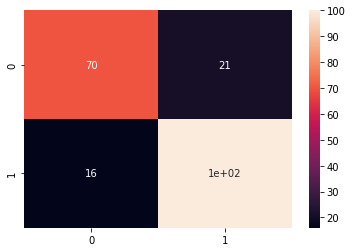

In [41]:
print('Confusion matrix test accuracy')
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True) 

In [42]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
svm = SVC()
svm.fit(features, y_train)
y_pred = svm.predict(features_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7733    0.6374    0.6988        91
           1     0.7500    0.8534    0.7984       116

    accuracy                         0.7585       207
   macro avg     0.7617    0.7454    0.7486       207
weighted avg     0.7603    0.7585    0.7546       207



In [43]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix test accuracy') 
confusion_matrix(y_test, y_pred)

Confusion matrix test accuracy


array([[58, 33],
       [17, 99]])

Confusion matrix test accuracy


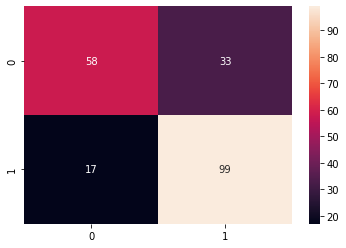

In [44]:
print('Confusion matrix test accuracy')
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True) 

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(features, y_train)
y_pred = dt.predict(features_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6289    0.6703    0.6489        91
           1     0.7273    0.6897    0.7080       116

    accuracy                         0.6812       207
   macro avg     0.6781    0.6800    0.6785       207
weighted avg     0.6840    0.6812    0.6820       207



In [46]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix test accuracy') 
confusion_matrix(y_test, y_pred)

Confusion matrix test accuracy


array([[61, 30],
       [36, 80]])

Confusion matrix test accuracy


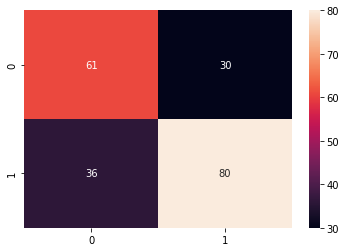

In [47]:
print('Confusion matrix test accuracy')
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True) 

In [48]:
from sklearn.naive_bayes import GaussianNB
g=GaussianNB()
g.fit(features,y_train)
y_pred = g.predict(features_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6721    0.4505    0.5395        91
           1     0.6575    0.8276    0.7328       116

    accuracy                         0.6618       207
   macro avg     0.6648    0.6391    0.6361       207
weighted avg     0.6640    0.6618    0.6478       207



In [49]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix test accuracy') 
confusion_matrix(y_test, y_pred)

Confusion matrix test accuracy


array([[41, 50],
       [20, 96]])

Confusion matrix test accuracy


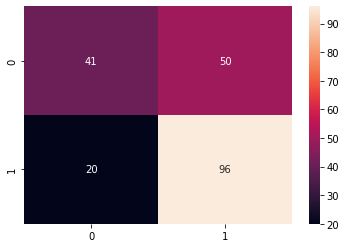

In [50]:
print('Confusion matrix test accuracy')
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True) 

In [51]:
from sklearn.neighbors import KNeighborsClassifier
clf3 = KNeighborsClassifier(n_neighbors=3)
clf3.fit(features, y_train)
y_pred = clf3.predict(features_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8229    0.8681    0.8449        91
           1     0.8919    0.8534    0.8722       116

    accuracy                         0.8599       207
   macro avg     0.8574    0.8608    0.8586       207
weighted avg     0.8616    0.8599    0.8602       207



In [52]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix test accuracy') 
confusion_matrix(y_test, y_pred)

Confusion matrix test accuracy


array([[79, 12],
       [17, 99]])

Confusion matrix test accuracy


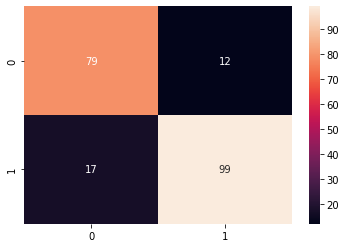

In [53]:
print('Confusion matrix test accuracy')
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True) 

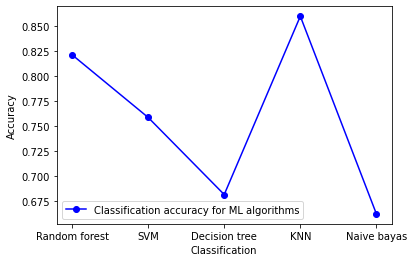

In [54]:
import matplotlib.pyplot as plt
classification=['Random forest','SVM','Decision tree','KNN','Naive bayas']
accuracy=[0.8213,0.7585,0.6812,0.8599,0.6618]
plt.plot(classification,accuracy,'b-o',label='Classification accuracy for ML algorithms');
plt.xlabel('Classification')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

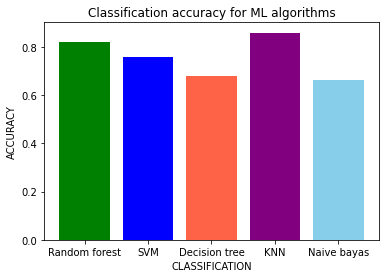

In [55]:
x=['Random forest','SVM','Decision tree','KNN','Naive bayas']
y =[0.8213,0.7585,0.6812,0.8599,0.6618]
plt.bar(x,y, color=['green', 'blue', 'tomato', 'purple', 'skyblue'])
plt.xlabel('CLASSIFICATION')
plt.ylabel("ACCURACY")
plt.title('Classification accuracy for ML algorithms')
plt.show()